# Parte 4: Teste de hipótese
Conduzir testes inferenciais adequados que possam dar base à tomada de decisão

Embora seja um clichê pensarmos que alguns grupos de países são mais avançados que outros, isso nem sempre se confirma quando observamos dados. Nesta parte do trabalho, verificaremos se temos dados suficientes para justificar afirmações como esta. Tome por base o modelo estatístico que você encontrou na etapa anterior para as classificações “avançado” ou “atrasado” de países e:

- Para cada bloco, encontre a probabilidade de um país sorteado aleatoriamente naquele bloco ser da categoria “avançado” (isto é: P(avançado|bloco)).
- Usando bootstrapping, calcule o intervalo de confiança de 90% para P(avançado|bloco) para cada bloco.
- Mostre, em uma figura, P(avançado|bloco) e os intervalos de confiança calculados. Há sobreposição dos intervalos de confiança? Quais?
- Levando em consideração os intervalos de confiança, seria seguro dizer que países de um bloco são tipicamente mais “avançados” que os de outro bloco em relação ao indicador que você escolheu?


##### Reutilizando dados da APS3

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [3]:
import pandas as pd

#OTAN
df = pd.read_csv('dados_corrigidos/API_SE.PRM.UNER.ZS_DS2_en_csv_v2_4492680.csv', sep=',', encoding='latin1', skiprows=4, decimal='.')
filtro_otan = ['United States','Canada','Belgium','France','Italy','Denmark','Iceland','Norway','Portugal','Luxembourg','United Kingdom','Greece','Turkiye','Germany','Poland','Czech Republic','Hungary']
df_otan = df[df['Country Name'].isin(filtro_otan)]
df_otan['Avançado'] = df['2019'] < 5

#BRICS
filtros_brics = ['Brazil','India', 'South Africa', 'Russian Federation', 'China']
df_brics = df[df['Country Name'].isin(filtros_brics)]
df_brics['Avançado'] = df['2019'] < 5

/var/folders/_1/r43prrg90j18zc5g3c_q_qt00000gn/T/ipykernel_1793/434612064.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_otan['Avançado'] = df['2019'] < 5
/var/folders/_1/r43prrg90j18zc5g3c_q_qt00000gn/T/ipykernel_1793/434612064.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brics['Avançado'] = df['2019'] < 5


### EX1


P(avançado | BRICS)

In [4]:
print(f"OTAN: {100 * len(df_otan[df_otan['Avançado'] == True]) / len(df_otan):.1f}%")

OTAN: 94.1%


P(avançado | OTAN)

In [5]:
print(f"BRICS: {100 * len(df_brics[df_brics['Avançado'] == True]) / len(df_brics)}%")

BRICS: 40.0%


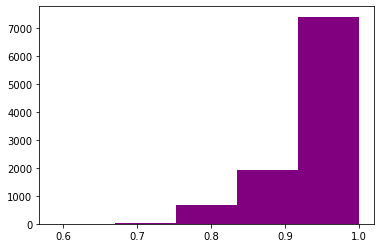

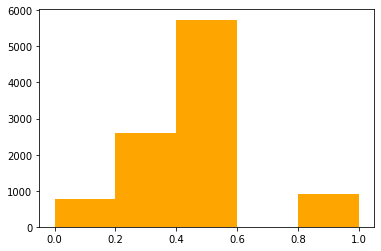

In [8]:
df_otan = df_otan.replace(True, 'Avançado')
df_otan = df_otan.replace(False, 'Atrasado')
df_brics = df_brics.replace(True, 'Avançado')
df_brics = df_brics.replace(True, 'Atrasado')

def reamostrar_varias_vezes_median(amostras, m, n=9999):
    std = []
    for i in range(n):
        amostras_ = np.random.choice(amostras, size=m, replace=True)
        avancado = 0
        for i in amostras_:
            if i == 'Avançado':
                avancado += 1
        std.append(avancado/m)
    return np.median(std), np.percentile(std, 5), np.percentile(std, 95), std

media_ot, percentil_5_ot, percentil_95_ot, amostra_ot = reamostrar_varias_vezes_median(df_otan['Avançado'], len(df_otan['Avançado']))
media_br, percentil_5_br, percentil_95_br, amostra_br = reamostrar_varias_vezes_median(df_brics['Avançado'], len(df_brics['Avançado']))
    

plt.figure()
plt.hist(amostra_ot, bins=5, color=['purple'])
plt.show()

plt.figure()
plt.hist(amostra_br, bins=5, color=['orange'])
plt.show()